In [2]:
import os
import copy as cp
import csv
import pandas as pd
from sparta.Auxil.PeriodicityDetector import PeriodicityDetector
from sparta.UNICOR.Spectrum import Spectrum
from sparta.UNICOR.Template import Template
from sparta.Auxil.TimeSeries import TimeSeries
from sparta.Observations import Observations
import numpy as np
import matplotlib.pyplot as plt

In [70]:
# DATA PARAMETERS

survey = "HARPS" # survey name
sample_rate = 1 # sample rate of the data
min_wv = 3800 # minimum wavelength of the data
max_wv = 6900 # maximum wavelength of the data
spec_dir = r"C:\Users\kentb\Desktop\PDM\data\HARPS\spectra" # directory of the spectrum
obs_data = Observations(survey=survey, sample_rate=sample_rate, min_wv=min_wv, max_wv=max_wv,
                        target_visits_lib=spec_dir)

let's goooo
Using target_visits_lib: C:\Users\kentb\Desktop\PDM\data\HARPS\spectra
Selected directory: C:\Users\kentb\Desktop\PDM\data\HARPS\spectra
File readme_2780a690-fe8b-41c0-a6c5-8a2fe49ce838.txt is not a fits file, skipping...
File readme_archive.txt is not a fits file, skipping...
File requested_files.txt is not a fits file, skipping...


In [43]:
df.keys()

Index(['adp_dpid', 'raw_dpid', 'progid', 'dpr_tech', 'dpr_type', 'ins_mode',
       'tel_object', 'tel_targ_alpha', 'tel_targ_delta', 'date_obs', 'mjd_obs',
       'exptime', 'ins_det1_tmmean', 'drs_bjd', 'drs_version_number',
       'drs_snr', 'drs_berv', 'drs_mask', 'drs_ccf_rvc', 'drs_ccf_rv',
       'drs_bis_rv', 'drs_dvrms', 'drs_ccf_contrast', 'drs_ccf_fwhm',
       'drs_ccf_noise', 'drs_bis_span', 'drs_drift_noise', 'drs_drift_rv_used',
       'H_I_6562_rv', 'H_I_6562_rv_error', 'H_I_6562_fit_chi2',
       'main_id_simbad', 'sp_type_simbad', 'main_type_simbad',
       'other_types_simbad', 'ra_simbad', 'dec_simbad', 'radvel_simbad',
       'radvel_err_simbad', 'plx_simbad', 'plx_err_simbad', 'pmra_simbad',
       'pmdec_simbad', 'pmra_err_simbad', 'pmdec_err_simbad',
       'pm_err_pa_simbad', 'Bmag_simbad', 'Vmag_simbad', 'Jmag_simbad',
       'Hmag_simbad', 'Kmag_simbad', 'angDist_simbad'],
      dtype='object')

In [71]:
rv_dir =  r"C:\Users\kentb\Desktop\PDM\data\HARPS\RV\barnard_rv.csv"  # directory of the RVs
df = pd.read_csv(rv_dir)
rv = df.drs_ccf_rvc.astype(float).values
times = df.drs_bjd.astype(float).values

In [72]:
unique_id = True
ids = df.date_obs.astype(str).values
ids = [id.replace(':','-') for id in ids]
print(len(rv))
print(len(obs_data.time_series.times))
obs_data.rearrange_time_series(rv=rv, times=times,ids=ids,unique_id=unique_id)
print(len(obs_data.time_series.times))

335
334
Matching ratio -> 100 %
334


In [6]:
print(ids)

['2007-04-04T09-17-51.376', '2007-04-06T09-02-30.189', '2007-04-07T09-18-58.054', '2007-04-08T09-11-58.465', '2007-04-09T09-51-56.457', '2007-04-10T09-55-45.767', '2007-04-12T09-52-35.790', '2007-05-07T08-02-20.561', '2007-07-10T02-05-01.328', '2007-07-17T04-55-15.833', '2007-08-03T03-39-28.247', '2007-08-04T03-19-24.635', '2007-08-07T03-06-13.567', '2007-08-08T03-23-31.344', '2007-08-28T03-26-23.351', '2007-08-31T01-11-55.452', '2007-09-04T01-13-46.157', '2007-10-12T00-29-25.357', '2007-10-15T23-57-47.560', '2008-02-27T09-04-05.148', '2008-03-26T09-38-09.331', '2008-05-02T09-53-25.438', '2009-04-27T07-14-03.474', '2009-04-30T07-37-10.043', '2009-05-05T08-00-47.703', '2009-08-11T03-27-27.682', '2010-03-28T08-58-45.364', '2010-04-19T08-54-39.481', '2010-07-11T01-50-43.554', '2010-07-19T02-06-06.856', '2010-07-26T03-18-00.984', '2010-09-18T00-52-13.694', '2010-10-15T23-41-53.534', '2011-03-14T09-18-20.939', '2011-03-25T09-32-25.321', '2011-04-09T07-51-12.929', '2011-04-21T08-04-56.124', 

In [7]:
print(obs_data.unique_ids)

['2007-04-07T09-18-58.054', '2007-08-28T03-26-23.351', '2007-08-07T03-06-13.567', '2007-04-12T09-52-35.790', '2007-08-03T03-39-28.247', '2007-04-04T09-17-51.376', '2007-04-10T09-55-45.767', '2007-07-10T02-05-01.328', '2007-05-07T08-02-20.561', '2007-07-17T04-55-15.833', '2007-04-08T09-11-58.465', '2007-04-09T09-51-56.457', '2007-10-15T23-57-47.560', '2007-04-06T09-02-30.189', '2007-08-31T01-11-55.452', '2007-08-08T03-23-31.344', '2007-09-04T01-13-46.157', '2007-10-12T00-29-25.357', '2007-08-04T03-19-24.635', '2008-03-26T09-38-09.331', '2008-05-02T09-53-25.438', '2008-02-27T09-04-05.148', '2009-05-05T08-00-47.703', '2009-08-11T03-27-27.682', '2009-04-30T07-37-10.043', '2009-04-27T07-14-03.474', '2010-07-19T02-06-06.856', '2010-07-26T03-18-00.984', '2010-03-28T08-58-45.364', '2010-10-15T23-41-53.534', '2010-04-19T08-54-39.481', '2010-09-18T00-52-13.694', '2010-07-11T01-50-43.554', '2011-03-14T09-18-20.939', '2011-10-05T23-31-21.024', '2011-05-10T07-53-51.463', '2011-04-27T08-10-59.240', 

In [78]:
qz_csv_dir = r'C:\Users\kentb\Desktop\PDM\thesis\main\testing_rassine\barnard_csv'
qz_rassine_dir = r'C:\Users\kentb\Desktop\PDM\thesis\main\testing_rassine\barnard_output'

# get all file names, remove the extension for csv files and remove the everything and the extension before the first underscore for rassine files
qz_csv_files = [os.path.splitext(file)[0] for file in os.listdir(qz_csv_dir)]
qz_rassine_files = [file.split("_", 1)[1] for file in os.listdir(qz_rassine_dir)]
qz_rassine_files = [os.path.splitext(file)[0] for file in qz_rassine_files]

# check which ones are missing

missing = []
for file in qz_csv_files:
    if file not in qz_rassine_files:
        missing.append(file)
print(len(missing))
print(missing)

# make a new folder and put the missing csv files in there

missing_dir = r'C:\Users\kentb\Desktop\PDM\thesis\main\testing_rassine\barnard_missing'
for file in missing:
    os.rename(os.path.join(qz_csv_dir, file + '.csv'), os.path.join(missing_dir, file + '.csv'))

4
['2011-06-02T06-50-21.047', '2012-06-02T06-00-58.498', '2012-07-09T00-55-02.311', '2017-09-02T00-32-46.162']


In [8]:
#Store each observation in a csv file.
for spec,unique_id in zip(obs_data.time_series.vals,obs_data.unique_ids):
    wave = spec.wv[0]
    flux = spec.sp[0]
    with open(r"C:\Users\kentb\Desktop\PDM\data\HARPS\barnard_csv\%s.csv" % unique_id, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')
        writer.writerow(['wave', 'flux'])
        writer.writerows(zip(wave, flux))

In [62]:
print(len(obs_data.time_series.calculated_vrad_list))

334


In [73]:
#replace in obs_data.time_series.vals the flux by the flux/continuum

for idx, file in enumerate(os.listdir('barnard_output')):
    file_path = os.path.join('barnard_output', file)
    unique_id=file.split('.')[0]+'.'+file.split('.')[1]
    unique_id = unique_id.split('_')[1]
    print(unique_id)
    rassine_spec = pd.read_pickle(file_path)
    wave = rassine_spec['wave']
    flux = rassine_spec['flux']/rassine_spec['output']['continuum_linear']
    for idx2,_ in enumerate(obs_data.time_series.vals):
        if str(obs_data.unique_ids[idx2]) == unique_id:
            print(obs_data.unique_ids[idx2],unique_id," ok")
            # print(obs_data.time_series.vals[idx2].sp)
            obs_data.time_series.vals[idx2].wv = [wave]
            obs_data.time_series.vals[idx2].sp = [flux]

2007-04-04T09-17-51.376
2007-04-04T09-17-51.376 2007-04-04T09-17-51.376  ok
2007-04-06T09-02-30.189
2007-04-06T09-02-30.189 2007-04-06T09-02-30.189  ok
2007-04-07T09-18-58.054
2007-04-07T09-18-58.054 2007-04-07T09-18-58.054  ok
2007-04-08T09-11-58.465
2007-04-08T09-11-58.465 2007-04-08T09-11-58.465  ok
2007-04-09T09-51-56.457
2007-04-09T09-51-56.457 2007-04-09T09-51-56.457  ok
2007-04-10T09-55-45.767
2007-04-10T09-55-45.767 2007-04-10T09-55-45.767  ok
2007-04-12T09-52-35.790
2007-04-12T09-52-35.790 2007-04-12T09-52-35.790  ok
2007-05-07T08-02-20.561
2007-05-07T08-02-20.561 2007-05-07T08-02-20.561  ok
2007-07-10T02-05-01.328
2007-07-10T02-05-01.328 2007-07-10T02-05-01.328  ok
2007-07-17T04-55-15.833
2007-07-17T04-55-15.833 2007-07-17T04-55-15.833  ok
2007-08-03T03-39-28.247
2007-08-03T03-39-28.247 2007-08-03T03-39-28.247  ok
2007-08-04T03-19-24.635
2007-08-04T03-19-24.635 2007-08-04T03-19-24.635  ok
2007-08-07T03-06-13.567
2007-08-07T03-06-13.567 2007-08-07T03-06-13.567  ok
2007-08-08T0

2010-04-19T08-54-39.481 2010-04-19T08-54-39.481  ok
2010-07-11T01-50-43.554
2010-07-11T01-50-43.554 2010-07-11T01-50-43.554  ok
2010-07-19T02-06-06.856
2010-07-19T02-06-06.856 2010-07-19T02-06-06.856  ok
2010-07-26T03-18-00.984
2010-07-26T03-18-00.984 2010-07-26T03-18-00.984  ok
2010-09-18T00-52-13.694
2010-09-18T00-52-13.694 2010-09-18T00-52-13.694  ok
2010-10-15T23-41-53.534
2010-10-15T23-41-53.534 2010-10-15T23-41-53.534  ok
2011-03-14T09-18-20.939
2011-03-14T09-18-20.939 2011-03-14T09-18-20.939  ok
2011-03-25T09-32-25.321
2011-03-25T09-32-25.321 2011-03-25T09-32-25.321  ok
2011-04-09T07-51-12.929
2011-04-09T07-51-12.929 2011-04-09T07-51-12.929  ok
2011-04-21T08-04-56.124
2011-04-21T08-04-56.124 2011-04-21T08-04-56.124  ok
2011-04-23T08-06-29.079
2011-04-23T08-06-29.079 2011-04-23T08-06-29.079  ok
2011-04-24T07-50-51.442
2011-04-24T07-50-51.442 2011-04-24T07-50-51.442  ok
2011-04-25T07-50-48.631
2011-04-25T07-50-48.631 2011-04-25T07-50-48.631  ok
2011-04-26T07-01-47.548
2011-04-26T0

In [61]:
obs_data.clean_time_series(nan_flag=False, min_wv=6560, max_wv=6565, size_flag=True)

Cleaning time series...


In [74]:
# PERIODOGRAM PARAMETERS

baseline = np.max(obs_data.time_series.times) - np.min(obs_data.time_series.times) # baseline of the data
min_freq = 1/1000 # Or maybe 1/2/baseline to be sure but let's test it that way.
max_freq = 1/20 # depends on the star.
freq_range = (min_freq, max_freq) # frequency range of the periodograms
points_per_peak = 10
periodogram_grid_resolution = 25000#points_per_peak*max_freq*baseline # frequency resolution of the periodograms

# RESULS DIRECTORY

results_dir = r'C:\Users\kentb\Desktop\PDM\thesis\main\testing_rassine' # directory of the results

In [75]:
## Compute periodograms

# Choosing frequency range and frequency resolution for the periodograms.
obs_data.initialize_periodicity_detector(freq_range=freq_range,periodogram_grid_resolution=periodogram_grid_resolution)

obs_data.periodicity_detector.calc_GLS()

print("GLS done",flush=True)

# obs_data.periodicity_detector.calc_PDC(calc_biased_flag=False, calc_unbiased_flag=True)

# print("PDC done",flush=True)

# obs_data.periodicity_detector.calc_USURPER(calc_biased_flag=False, calc_unbiased_flag=True)

# print("USURPER done",flush=True)

obs_data.periodicity_detector.calc_partial_periodogram(partial_type="shape")

print("Shape done",flush=True)

obs_data.periodicity_detector.calc_partial_periodogram(partial_type="shift")

print("Shift done",flush=True)

GLS done
Shape done
Shift done


In [77]:
# Save the observations instance in a csv file with the name of the spec_dir name in the results directory

with open(os.path.join(results_dir, f"{spec_dir.rsplit('/',maxsplit=1)[-1]}_{str(min_wv)}_{str(max_wv)}_rassine.csv"), 'w',newline='',encoding='utf-8') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(["freq", "gls","usurper","pdc_unbiased","shape_periodogram", "shift_periodogram"])
    for i in range(len(obs_data.periodicity_detector.results_frequency['GLS'])):
        writer.writerow([obs_data.periodicity_detector.results_frequency['GLS'][i],
                        obs_data.periodicity_detector.results_power['GLS'][i],
                        0,
                        0,
                        obs_data.periodicity_detector.results_power['shape_periodogram'][i],
                        obs_data.periodicity_detector.results_power['shift_periodogram'][i]])

In [8]:
print(len(obs_data.time_series.times),len(obs_data.time_series.vals),len(obs_data.time_series.calculated_vrad_list))

334 334 334


In [19]:
from sparta.Statistics import open_csv
plt.style.use('sparta')

In [78]:
rdir = r'C:\Users\kentb\Desktop\PDM\data\HARPS\spectra_3800_6900_rassine.csv'
results = open_csv(rdir)

In [30]:
print(results)

{'period': array([2.28429763e+03, 2.07663421e+03, 1.90358136e+03, ...,
       2.00043579e+00, 2.00026062e+00, 2.00008548e+00]), 'gls': array([0.00645708, 0.00106768, 0.01444297, ..., 0.0090786 , 0.01244754,
       0.01695614]), 'usurper': array([0.12475182, 0.13630329, 0.16946721, ..., 0.07590965, 0.08819288,
       0.06519135]), 'pdc': array([0.19074317, 0.21195909, 0.22009311, ..., 0.10376695, 0.12806328,
       0.08055816]), 'shape': array([0.05277632, 0.05161325, 0.08460818, ..., 0.0363534 , 0.03530075,
       0.03197853]), 'shift': array([0.15157612, 0.17168777, 0.16611081, ..., 0.07860462, 0.1012065 ,
       0.05933572])}


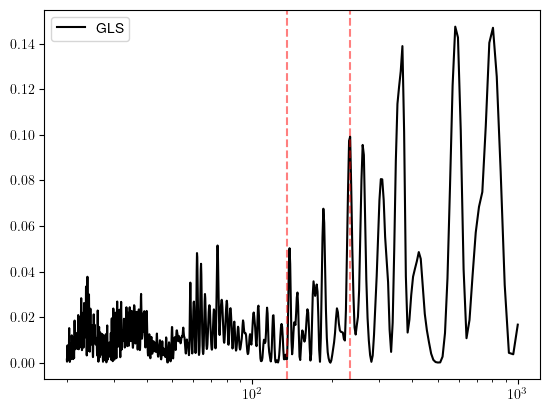

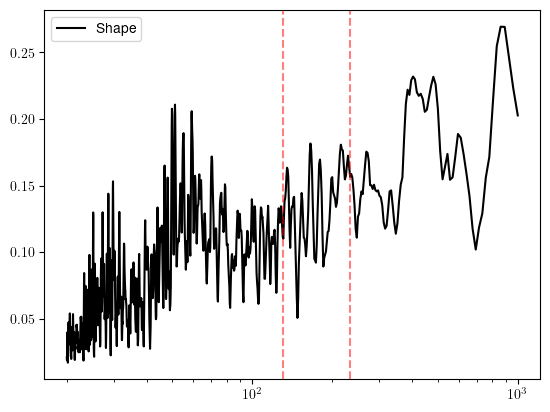

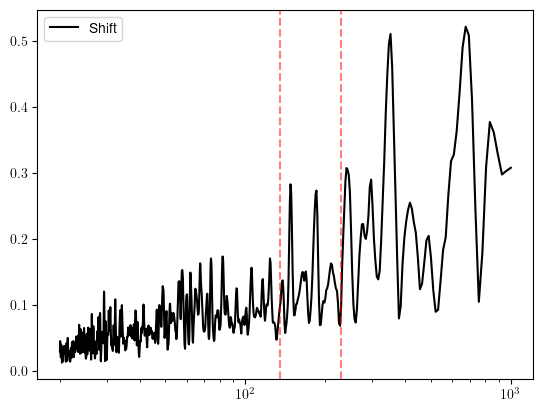

In [79]:
plt.figure()
plt.plot(results['period'],results['gls'],label='GLS')
plt.axvline(232.8,color='red',linestyle='--',alpha=0.5)
plt.axvline(135,color='red',linestyle='--',alpha=0.5)
plt.legend()
plt.xscale('log')
plt.figure()
plt.plot(results['period'],results['shape'],label='Shape')
#plot at 232 days and 130 days
plt.axvline(232.8,color='red',linestyle='--',alpha=0.5)
plt.axvline(130,color='red',linestyle='--',alpha=0.5)
plt.legend()
plt.xscale('log')
plt.figure()
plt.plot(results['period'],results['shift'],label='Shift')
plt.axvline(230,color='red',linestyle='--',alpha=0.5)
plt.axvline(135,color='red',linestyle='--',alpha=0.5)
plt.xscale('log')
plt.legend()

In [68]:
#show first 10 peaks in shape
from scipy.signal import find_peaks
peaks_shape = find_peaks(results['shape'],distance=10)
peaks_shift = find_peaks(results['shift'],distance=10)
period_peaks_shape = results['period'][peaks_shape[0]]
period_peaks_shift = results['period'][peaks_shift[0]]
power_peaks_shape = results['shape'][peaks_shape[0]]
power_peaks_shift = results['shift'][peaks_shift[0]]
for period,power in zip(period_peaks_shape,power_peaks_shape):
    print(period,power)

694.4444444444439 0.20428334147012966
423.72881355932134 0.13237275803636245
352.11267605633736 0.16470263462704046
274.7252747252742 0.11353204005253015
240.38461538461496 0.1536852998185226
215.51724137930987 0.12375873355911975
185.1851851851848 0.12820879231352347
161.2903225806448 0.07595411397875579
147.9289940828399 0.13364280199552084
138.8888888888886 0.10338241578660956
129.53367875647638 0.09445040822501392
117.37089201877906 0.08024807400212695
110.61946902654843 0.08554361028685575
105.04201680672246 0.09604866696659188
100.80645161290298 0.06808055473058815
96.5250965250963 0.08232460970259478
91.91176470588215 0.09613423827244257
85.61643835616417 0.062241352732575875
81.96721311475389 0.09912001543186408
77.39938080495338 0.08261036222178178
73.96449704141995 0.11435624640917608
71.02272727272711 0.06835624956205953
67.20430107526865 0.07287086757718257
64.76683937823819 0.0894413230488069
62.03473945409414 0.09770694338341966
60.24096385542153 0.08469392346789903
58.54

In [69]:
for period,power in zip(period_peaks_shift,power_peaks_shift):
    print(period,power)

757.575757575757 0.037065224308879055
454.5454545454539 0.03092225199703665
378.7878787878781 0.08546937769379201
304.87804878048723 0.025215579656648883
252.52525252525203 0.050927681914462536
225.22522522522476 -0.005178048376950224
204.91803278688482 -0.0017181316208770526
182.48175182481714 0.06400992449064566
166.6666666666663 0.09657483657017624
152.43902439024356 0.057208762023505964
141.24293785310704 0.0444128293711168
126.90355329949207 0.040906140017019935
118.48341232227459 0.02934090195113255
108.6956521739128 0.061851391408371585
102.04081632653036 0.07003532238700791
95.05703422053209 0.016560399294954658
90.90909090909066 0.04646280823703666
87.10801393728201 0.03223656277454247
80.6451612903224 0.01660158403274462
76.21951219512177 0.022037534226097867
73.0994152046782 0.02756034489716861
70.42253521126742 0.02358128706116016
68.30601092896158 0.03222365669253471
66.31299734747994 0.0306965241194816
63.13131313131298 0.017282141825476317
60.97560975609741 0.03445920469

In [73]:
#plot window power using times
freq, power = obs_data.periodicity_detector.window_power_spectrum()
# plt.figure()
# plt.xscale('log')
# plt.plot(1/freq,power)

In [74]:
#peaks in window power

peaks_window = find_peaks(power,distance=10)
period_peaks_window = 1/freq[peaks_window[0]]
power_peaks_window = power[peaks_window[0]]
#sort by power
idx = np.argsort(power_peaks_window)[::-1]
period_peaks_window = period_peaks_window[idx]
power_peaks_window = power_peaks_window[idx]
for period,power in zip(period_peaks_window,power_peaks_window):
    print(period,power)

0.9972680225157328 0.9874334072419941
0.9999747212261421 0.8352641326099765
368.1161442399271 0.7786998089810481
0.4986400383360482 0.7774040961438112
0.998575883345737 0.674126653089189
747.6332183850362 0.6517627808143373
323.76714022648906 0.6469920309084778
1.0004345692474133 0.6414552070726433
0.49931035520304046 0.6346101523370749
0.9977471735130258 0.6235771797106043
0.9968110802182409 0.5718588216664688
0.9959201605363376 0.5609258315812076
0.4989667971874476 0.5602254627570437
0.999078139979619 0.5509379758165063
0.994684207643697 0.5416559017682754
259.42091007533173 0.516525047674389
0.4994304393225094 0.5126839896662375
0.9942079933025723 0.5034890886327175
549.7215672236578 0.5023346725971817
144.5266597694321 0.4697491814132792
227.17186582985124 0.45128512589813236
0.9934729219157209 0.45016715074841335
1.002498130815895 0.4486225638539477
1.0011580426779285 0.44810716495990244
1.0016848627446342 0.44564300968752013
191.06871957154408 0.43935188015545035
1.00430522364006

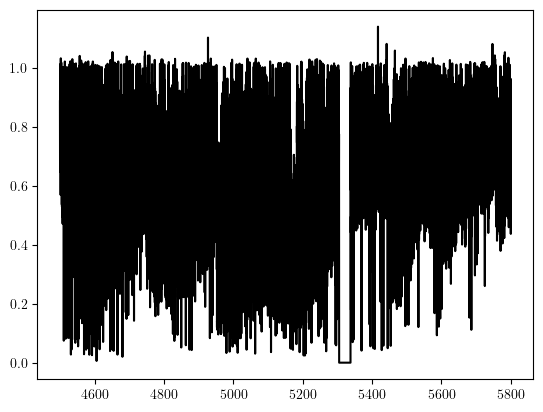

In [28]:
plt.plot(obs_data.time_series.vals[0].wv[0],obs_data.time_series.vals[0].sp[0])